# Expeiment 2: Linear Classification and Gradient Descent

************ Output Of Training For 100 epoch ******************* 

 TRAIN_LOSS 
epoch 0: 
0.89466524155

 VALIADATION_LOSS 
epoch 0: 
0.484290639604

 TRAIN_LOSS 
epoch 1: 
0.89323164155

 VALIADATION_LOSS 
epoch 1: 
0.484373839604

 TRAIN_LOSS 
epoch 2: 
0.89179804155

 VALIADATION_LOSS 
epoch 2: 
0.484457039604

 TRAIN_LOSS 
epoch 3: 
0.89036444155

 VALIADATION_LOSS 
epoch 3: 
0.484540239604

 TRAIN_LOSS 
epoch 4: 
0.88893084155

 VALIADATION_LOSS 
epoch 4: 
0.484623439604

 TRAIN_LOSS 
epoch 5: 
0.88749724155

 VALIADATION_LOSS 
epoch 5: 
0.484706639604

 TRAIN_LOSS 
epoch 6: 
0.88606364155

 VALIADATION_LOSS 
epoch 6: 
0.484789839604

 TRAIN_LOSS 
epoch 7: 
0.88463004155

 VALIADATION_LOSS 
epoch 7: 
0.484873039604

 TRAIN_LOSS 
epoch 8: 
0.88319644155

 VALIADATION_LOSS 
epoch 8: 
0.484956239604

 TRAIN_LOSS 
epoch 9: 
0.88176284155

 VALIADATION_LOSS 
epoch 9: 
0.485039439604

 TRAIN_LOSS 
epoch 10: 
0.88032924155

 VALIADATION_LOSS 
epoch 10: 
0.485122639604

 TRAIN_LOSS 
epoc

epoch 96: 
0.75703964155

 VALIADATION_LOSS 
epoch 96: 
0.492277839604

 TRAIN_LOSS 
epoch 97: 
0.75560604155

 VALIADATION_LOSS 
epoch 97: 
0.492361039604

 TRAIN_LOSS 
epoch 98: 
0.75417244155

 VALIADATION_LOSS 
epoch 98: 
0.492444239604

 TRAIN_LOSS 
epoch 99: 
0.75273884155

 VALIADATION_LOSS 
epoch 99: 
0.492527439604




******************************************************************* 
This Result Experiment 2 Linear Classification and Gradient Descent 
******************************************************************** 


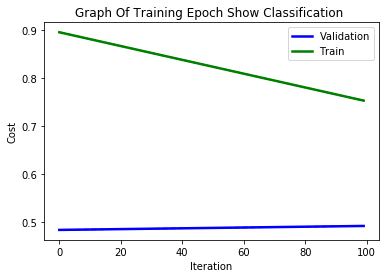

In [28]:
#*************************************************************************
from sklearn.model_selection import train_test_split
import numpy as np

def compute_loss(x,y,k):
    n = x.shape[1]
    total = 0
    for z in range(x.shape[0]):
        if np.sum((1 - y[z] * (x[z] * w + b[z]))) > 0:
            total += np.sum((1 - y[z] * (x[z] * w + b[z])))
    loss = np.sum(np.square(w)) / (2*n) + C * total
    print('epoch '+ str(k) + ': ')
    print(loss)
    return loss

# This  step am get Dataset from my computer 
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file("C:/ABAS/DATA/australian_scale.txt")
x, y = data[0], data[1]
# THIS Step : ***************   Devided The Dataset into Traning set and Validation Set   **********
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.35,random_state=44)
x_train,x_validation,y_train,y_validation = x_train.todense(),x_validation.todense(),y_train.reshape(len(y_train),-1),y_validation.reshape(len(y_validation),-1)

#initialize b,w
b = np.zeros((x_train.shape[0],1))
w = np.empty((x_train.shape[1],1))

# training
iteration = 100 # number of epoch
learning_rate = 0.8
C = 0.002
train_loss=[] #  Training loss
validation_loss=[] #     Validation loss

#*************************************************************************************
print("************ Output Of Training For 100 epoch ******************* ")
for i in range(iteration):
  
    for j in range(x_train.shape[0]):
        if np.sum((1 - y_train[j] * (x_train[j] * w + b[j] ))) > 0:
            w_gradient = w + x_train[j].T * C * (-1 * y_train[j])
            b_gradient = -1 * C * y_train[j]
        else:
            w_gradient = w
            b_gradient = 0
        w = w - learning_rate * w_gradient
        b[j] = b[j] - learning_rate * b_gradient
        
    print('\n TRAIN_LOSS ')
    train_loss.append( compute_loss(x_train,y_train,i) )
    print('\n VALIADATION_LOSS ')
  
    validation_loss.append( compute_loss(x_validation,y_validation,i) )
    
print('\n')
print('\n')

#************************************************************************************************    

# # This Drawing Graph of L_train  as well as L_validation with the Number of iterations
import matplotlib.pyplot as PLO  # Import this fuction to draw graph
t = np.arange(0, iteration, 1)
PLO.plot(t, validation_loss, color="blue", linewidth=2.5, linestyle="-", label="Validation")
PLO.plot(t, train_loss, color="green",  linewidth=2.5, linestyle="-", label="Train")
PLO.legend(loc='upper right')
PLO.plot(t, train_loss, 'g--',t, validation_loss, 'b--')
PLO.xlabel('Iteration')
PLO.ylabel('Cost')
print("******************************************************************* ")
print("This Result Experiment 2 Linear Classification and Gradient Descent ")
print("******************************************************************** ")
PLO.title("Graph Of Training Epoch Show Classification ")
plt.show()

